In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Read the dataset to the python environment

In [2]:
data = pd.read_excel(r'C:\Users\hp\Downloads\iris (1).xls')

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# 2. Do necessary pre-processing steps.

In [6]:
data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [7]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

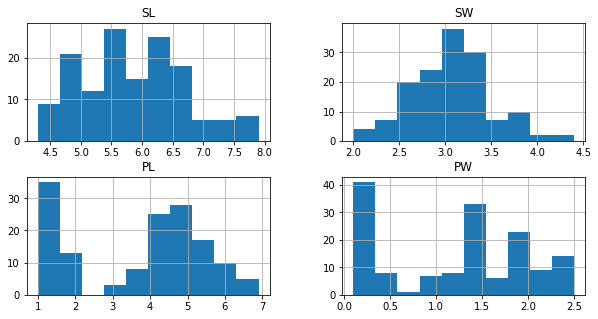

In [8]:
freqgraph = data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(10,5))
plt.show()

In [9]:
for i in ['SL', 'SW', 'PL']:
         data[i]=data[i].fillna(data[i].median())

In [10]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [11]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

# label encoding

In [12]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()

In [13]:
data['Classification']=label_en.fit_transform(data['Classification'])

In [14]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
data.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2
149,5.9,3.0,5.10,1.8,2


# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [16]:
x=data.drop(['Classification'],axis=1)
y=data['Classification']

In [17]:
#model training
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

# Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
#creating an instance
model=LogisticRegression()
#fiting in to x train and y train
model.fit(x_train,y_train)

C:\hp\anaconda3\envs\ipykernel_py3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
y_pred=model.predict(x_test)

In [20]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
print('accuracy is:',accuracy_score(y_test,y_pred)*100)
print('Confusion matrix is:',confusion_matrix(y_test.values,y_pred))

accuracy is: 97.77777777777777
Confusion matrix is: [[18  1  0]
 [ 0 13  0]
 [ 0  0 13]]


# knn

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(x_train,y_train)
y_pred = knn_model.predict(x_test)

In [22]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
print('accuracy is:',accuracy_score(y_test,y_pred)*100)
print('Confusion matrix is:',confusion_matrix(y_test.values,y_pred))

accuracy is: 95.55555555555556
Confusion matrix is: [[18  1  0]
 [ 0 12  1]
 [ 0  0 13]]


# Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred = dt_model.predict(x_test)

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('accuracy is:',accuracy_score(y_test,y_pred)*100)
print('Confusion matrix is:',confusion_matrix(y_test.values,y_pred))

accuracy is: 100.0
Confusion matrix is: [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


# Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier 
rf=RandomForestClassifier()

In [26]:
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [28]:
print('accuracy is:',accuracy_score(y_test,y_pred)*100)

accuracy is: 100.0


In [29]:
print('Confusion matrix is:',confusion_matrix(y_test.values,y_pred))

Confusion matrix is: [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


Descision tree and random forest algorithm gives the best result to predict the model